
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [351]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for creating plots and charts
import pylab # used for plots and numerical operations
import pingouin as pg # used for statistic analysis with a statistical package of scipy

In [352]:
df_mh = pd.read_csv('C:/Users/14359/Desktop/A1_analysing_data/data for A1/MillerHadenData.csv')

# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [353]:
# Check data types and information
df_mh.describe()

,Participant,Abil,IQ,Home,TV
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,55.120000,100.040000,124.000000,599.920000
std,7.359801,6.084954,9.043782,21.039645,95.056965
min,1.000000,45.000000,81.000000,87.000000,407.000000
25%,7.000000,50.000000,95.000000,108.000000,523.000000
50%,13.000000,54.000000,100.000000,123.000000,636.000000
75%,19.000000,61.000000,104.000000,141.000000,673.000000
max,25.000000,67.000000,118.000000,161.000000,787.000000


In [354]:
# Q1b (code):
# Check for missing values
missing_values=df_mh.isnull().sum()
missing_values

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64

In [355]:
# Check whether there is a data point for each participant on both variables
if True in df_mh.isnull()['Abil']:
    print("Missing data for this participant in 'Abil'.")
elif True in df_mh.isnull()['IQ']:
    print("Missing data for this participant in 'IQ'.")
else:
    print("All participants have data points in both 'Abil' and 'IQ'.")

All participants have data points in both 'Abil' and 'IQ'.


In [356]:
# Q1c (code):
# Check data distribution 
import scipy.stats as stats #used for shapiro-wilks test

# shapiro-wilks test for reading ability data
score_shapiro_Abil, p_val_shapiro_Abil = stats.shapiro(df_mh['Abil'])
print(p_val_shapiro_Abil)
if p_val_shapiro_Abil<0.05:
    print("Reading ability data are NOT normally distributed.")
else:
    print("Reading ability data are normally distributed.")

# shapiro-wilks test for IQ data
score_shapiro_IQ, p_val_shapiro_IQ = stats.shapiro(df_mh['IQ'])
print(p_val_shapiro_IQ)
if p_val_shapiro_IQ<0.05:
    print("IQ data are NOT normally distributed.")
else:
    print("IQ data are normally distributed.")

0.2354906052350998
Reading ability data are normally distributed.
0.49081143736839294
IQ data are normally distributed.


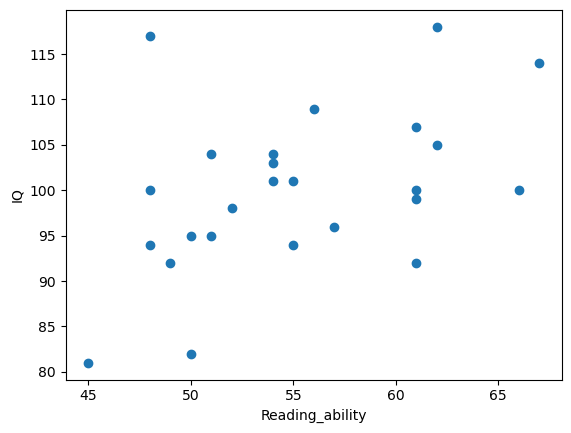

In [357]:
# Q1d (code):
# Scatter plot
Reading_ability=df_mh['Abil']
IQ=df_mh['IQ']
plt.scatter(Reading_ability, IQ)
plt.xlabel("Reading_ability")
plt.ylabel("IQ")
plt.show()

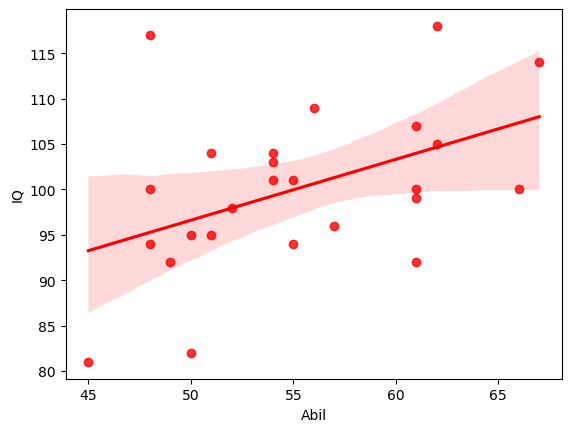

In [358]:
# Q1e (code):
# Correlation line
plot_corr=sns.regplot(x='Abil', y='IQ',color='r', data=df_mh)
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

### Q2a (answer with words):
We can use Pearson because the data of both variables are normally distributed and the relation is linear.

In [359]:
# Q2b (code):
corr_Abil_IQ=pg.corr(df_mh['Abil'], df_mh['IQ'])
print(corr_Abil_IQ)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


### Q2c (answer with words):
The correlation coefficient (r) is 0.45117, indicating a positive linear correlation between the two variables. When the value is higher than 0, as one variable increases, the other tends to increase as well. Additionally, the value is lower than 0.5, which suggests the association between the two variables is relatively weak.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

### Q3a (answer in words):
H0:There is NO relationship between the amount of time people spend reading at home and their reading ability.

H1:People with higher reading ability are more likely to spend more time reading at home compared to those with lower reading ability.

In [360]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for creating new columns
from scipy.stats import chi2_contingency ##used for performing a Chi-square test

# Define the rounded average for Reading Ability and Home
# The round() function is  used to round a number to the nearest whole number or to a specified number of decimal places.https://www.w3schools.com/python/ref_func_round.asp 
rounded_average_Home=round(df_mh['Home'].mean())    
rounded_average_Abil=round(df_mh['Abil'].mean()) 

# Create the Rank_Abil column
Abil_rank=[]
for item in df_mh['Abil']:
    if item > rounded_average_Abil:
        Abil_rank.append('high')
    else:
        Abil_rank.append('low')
df_mh['Rank_Abil']=Abil_rank

# Create the Rank_Home column
Home_rank=[]
for item in df_mh['Home']:
    if item > rounded_average_Home:
        Home_rank.append('frequent')
    else:
        Home_rank.append('infrequent')
df_mh['Rank_Home']=Home_rank

df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,high,frequent
1,2,56,109,123,608,high,infrequent
2,3,45,81,108,640,low,infrequent
3,4,66,100,155,493,high,frequent
4,5,49,92,103,636,low,infrequent


In [361]:
# Q3c (code):
# Construct Contingency Matrix
import numpy as np

# Create a dataframe with only the HIGH reading ability rows
high_abil=df_mh.loc[df_mh['Rank_Abil']=='high']

# Divide the data of reading time of this dataframe into a group of frequent reading and the other group of infrequent reading 
high_abil_fre_home=[item for item in high_abil['Rank_Home'] if item=='frequent']
high_abil_infre_home=[item for item in high_abil['Rank_Home'] if item=='infrequent']

# Create a dataframe with only the LOW reading ability rows
low_abil=df_mh.loc[df_mh['Rank_Abil']=='low']

# Divide the data of reading time of this dataframe into a group of frequent reading and the other group of infrequent reading 
low_abil_fre_home=[item for item in low_abil['Rank_Home'] if item=='frequent']
low_abil_infre_home=[item for item in low_abil['Rank_Home'] if item=='infrequent']

# We can store the observed frequencies in a list
data4contingency = []
data4contingency.append(len(high_abil_fre_home))
data4contingency.append(len(low_abil_fre_home))
data4contingency.append(len(high_abil_infre_home))
data4contingency.append(len(low_abil_infre_home))

print('The values:')
print(data4contingency)

# We transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)

print('The contingency matrix')
print(data_cm)

The values:
[8, 3, 2, 12]
The contingency matrix
[[ 8  3]
 [ 2 12]]


In [362]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 6.6]
 [5.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


### Q3e (answer in words):
p-value is lower than 0.05 and H0 is rejected, which suggests evidence for a relationship between the amount of time people spend reading at home and their reading ability.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [363]:
import pandas as pd # used for data manipulation and analysis
from scipy import stats # used for statistical operations
import numpy as np # used for numerical operations
import matplotlib.pyplot as plt ##used for creating plots and charts
import seaborn as sns #used for visualization

# Load the data
df_evaluators = pd.read_csv('C:/Users/14359/Desktop/A1_analysing_data/data for A1//evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [364]:
# Q4a (code):

# Filter out the rows with missing values
valid_data=df_evaluators.loc[df_evaluators.isnull()['age'] == False]

# Calculate mean and standard deviation for age
age_mean=valid_data['age'].mean()
age_std = df_evaluators['age'].std() # Return sample standard deviation over requested axis.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

print(age_mean)
print(age_std)

30.852941176470587
6.238358141327351


In [365]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male=df_evaluators.loc[df_evaluators['sex']==1, 'sex'].count()
female=df_evaluators.loc[df_evaluators['sex']==2, 'sex'].count()

# Display the gender counts
print("male evaluators:",male)
print("female evaluators:",female)

male evaluators: 4
female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [366]:
# Load ratings data
df_ratings = pd.read_csv('C:/Users/14359/Desktop/A1_analysing_data/data for A1/ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [367]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_ratings2=df_ratings.loc[(df_ratings['Category']=='thoughtful')|(df_ratings['Category'] == 'competent')|(df_ratings['Category'] == 'intelligent')]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean=df_ratings2.groupby('eval_id').mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category']='intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings=df_ratings.loc[(df_ratings['Category']=='impression')|(df_ratings['Category']=='hire')]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
concat_df=pd.concat([intellect_mean, other_ratings], axis=0)#pd.concat() is used to catenate pandas objects along a particular axis, and the axis=0 parameter indicates concatenating along the rows.https://chat.openai.com/c/0eb859cb-8c2e-4302-bd18-b3983d226237

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
merged_df = pd.merge(concat_df, df_evaluators, on='eval_id', how='left')# pd.merge() is used to combine DataFrames based on the values of common columns, and 'how='left''indicates a left join.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

# Select only the necessary columns as per the structure required
ratings2=merged_df.drop(['age','sex'], axis=1)

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])# This code will sort the values first by 'eval_id' and then within each 'eval_id' group, it will be sorted by 'Category'.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
ratings2.reset_index(drop=True, inplace=True) # Reset the index to remove the old index
# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()


C:\Users\14359\AppData\Local\Temp\ipykernel_30108\52982477.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  intellect_mean=df_ratings2.groupby('eval_id').mean().reset_index()


,eval_id,Rating,Category,condition
0,1,6.000000,hire,listened
1,1,7.000000,impression,listened
2,1,6.000000,intellect,listened
3,2,4.000000,hire,listened
4,2,4.666667,impression,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

Question 6:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?

### Q6a (answer in words):
Null hypothesis:There is no significant difference between overall ratings on the Intellect(or Hire or Impression) scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). 

Alternative hypothesis: There will be a significant difference between overall ratings on the Intellect(or Hire or Impression) scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

#### we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the Intellect,Hire and Impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

### Q6b (answer in words):
#### Which t-test should we choose, one-tail or two-tail? Explian why.
We should choose two-tailed test because we do not have a specific direction in mind.Namely, we are not sure one group's overall ratings are higher or lower than the other's. We only has the hypothesis that two groups' overall ratings on the Intellect,Hire and Impression scale are different.

### Q6c (answer in words):
#### What are the independent variable and the dependent variable here?
The independent variable is condition (read or listened), and the dependent variable is the overall ratings on the Intellect,Hire and Impression scale.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

#### First, we run t-test for intellect ratings.

In [368]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for tests for normal distribution, homogeneity of variances and independent t-test

# Descriptive analysis of the ratings on Intellect scale
inte_df=ratings2.loc[ratings2['Category']=='intellect']
inte_df.describe()

,eval_id,Rating
count,39.000000,39.000000
mean,20.000000,4.717949
std,11.401754,2.000787
min,1.000000,0.666667
25%,10.500000,3.500000
50%,20.000000,5.000000
75%,29.500000,6.000000
max,39.000000,9.000000


In [369]:
# Divide the intellect ratings into read group and listened group based on the condition
sub_inte=inte_df.groupby('condition')
inte_read=sub_inte.get_group('read')
inte_listened=sub_inte.get_group('listened')

<Axes: >

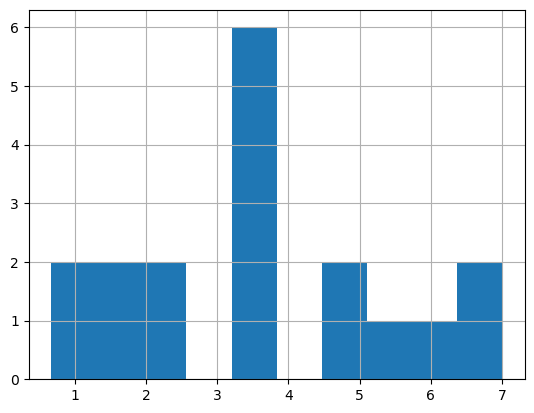

In [370]:
# Display the histogram
inte_read['Rating'].hist()

<Axes: >

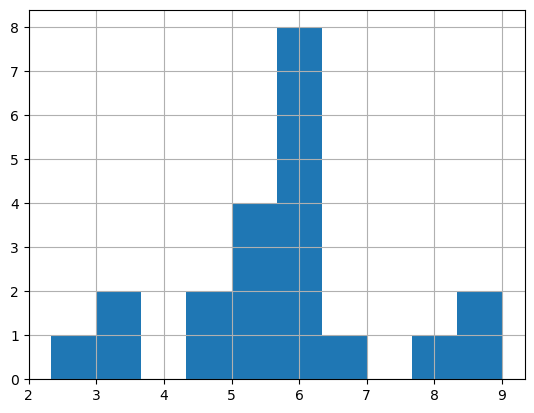

In [371]:
inte_listened['Rating'].hist()

In [391]:
# Test for normal distribution (Shapiro-Wilk test)

# H0: The data are normally distributed
# H1：The data are NOT normally distributed
# Test for normal distribution of intellect ratings in read group
score_shapiro_read, p_val_shapiro_read = stats.shapiro(inte_read['Rating'])
print(p_val_shapiro_read)
if p_val_shapiro_read<0.05:
    print('Read group: The data are NOT normally distributed, reject H0')
else:
    print('Read group: The data are normally distributed, confirm H0')

# Test for normal distribution of intellect ratings in listened group
score_shapiro_listened, p_val_shapiro_listened = stats.shapiro(inte_listened['Rating'])
print(p_val_shapiro_listened)
if p_val_shapiro_listened<0.05:
    print('listened group: The data are NOT normally distributed, reject H0')
else:
    print('listened group: The data are normally distributed, confirm H0')


0.4447984993457794
Read group: The data are normally distributed, confirm H0
0.17365092039108276
listened group: The data are normally distributed, confirm H0


In [373]:
# Test for homogeneity of variances (Levene's test)
# H0: The population variances are equal
# H1: The population variances are NOT equal
score, p_val = stats.levene(inte_read['Rating'], inte_listened['Rating'])
print(p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

0.34946205893248505
Levene's test is not significant - proceed


Now that the data are normally distributed and the population variances are equal, we can proceed to do independent t-test.

In [374]:
# Independent t-tests
ttest_score, p_val = stats.ttest_ind(inte_read['Rating'], inte_listened['Rating'])
print(p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

0.0011444414996286821
Difference is statistically significant - reject H0, confirm H1


#### Second, we run t-test for hire ratings.

In [375]:
# Descriptive analysis of the ratings on Hire scale
hire_df=ratings2.loc[ratings2['Category']=='hire']
hire_df.describe()

,eval_id,Rating
count,39.000000,39.000000
mean,20.000000,3.871795
std,11.401754,2.330343
min,1.000000,0.000000
25%,10.500000,2.000000
50%,20.000000,4.000000
75%,29.500000,5.000000
max,39.000000,8.000000


In [376]:
# Divide the intellect ratings into read group and listened group based on the condition
sub_hire=hire_df.groupby('condition')
hire_read=sub_hire.get_group('read')
hire_listened=sub_hire.get_group('listened')

<Axes: >

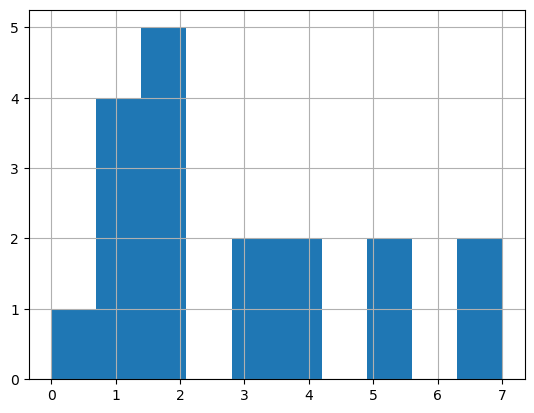

In [377]:
# Display the histogram
hire_read['Rating'].hist()

<Axes: >

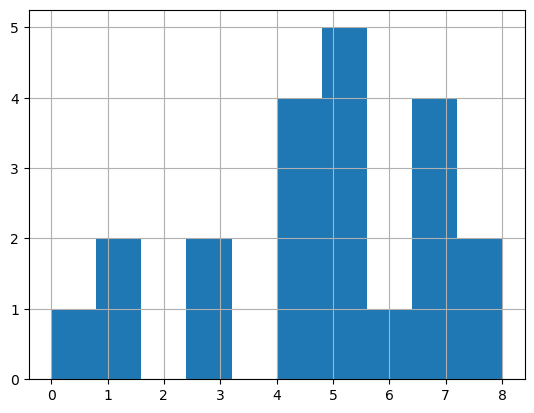

In [378]:
hire_listened['Rating'].hist()

In [379]:
# Test for normal distribution (Shapiro-Wilk test)

# H0: The data are normally distributed
# H1：The data are NOT normally distributed
# Test for normal distribution of hire ratings in read group
score_shapiro_read, p_val_shapiro_read = stats.shapiro(hire_read['Rating'])
print(p_val_shapiro_read)
if p_val_shapiro_read<0.05:
    print('Read group: The data are NOT normally distributed, reject H0')
else:
    print('Read group: The data are normally distributed, confirm H0')

# Test for normal distribution of hire ratings in listened group
score_shapiro_listened, p_val_shapiro_listened = stats.shapiro(hire_listened['Rating'])
print(p_val_shapiro_listened)
if p_val_shapiro_listened<0.05:
    print('listened group: The data are NOT normally distributed, reject H0')
else:
    print('listened group: The data are normally distributed, confirm H0')

0.06600592285394669
Read group: The data are normally distributed, confirm H0
0.20883114635944366
listened group: The data are normally distributed, confirm H0


In [380]:
# Test for homogeneity of variances (Levene's test)
# H0: The population variances are equal
# H1: The population variances are NOT equal
score, p_val = stats.levene(hire_read['Rating'], hire_listened['Rating'])
print(p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

0.7458453933447955
Levene's test is not significant - proceed


Now that the data are normally distributed and the population variances are equal, we can proceed to do independent t-test.

In [381]:
# Independent t-tests
ttest_score, p_val = stats.ttest_ind(hire_read['Rating'], hire_listened['Rating'])
print(p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")


0.012674511839824125
Difference is statistically significant - reject H0, confirm H1


#### Third, we run t-test for impression ratings.

In [382]:
# Descriptive analysis of the ratings on Impression scale
impre_df=ratings2.loc[ratings2['Category']=='impression']
impre_df.describe()

,eval_id,Rating
count,39.000000,39.000000
mean,20.000000,5.094017
std,11.401754,2.254234
min,1.000000,0.333333
25%,10.500000,3.666667
50%,20.000000,5.333333
75%,29.500000,7.000000
max,39.000000,8.666667


In [383]:
# Divide the impression ratings into read group and listened group based on the condition
sub_impre=impre_df.groupby('condition')
impre_read=sub_impre.get_group('read')
impre_listened=sub_impre.get_group('listened')

<Axes: >

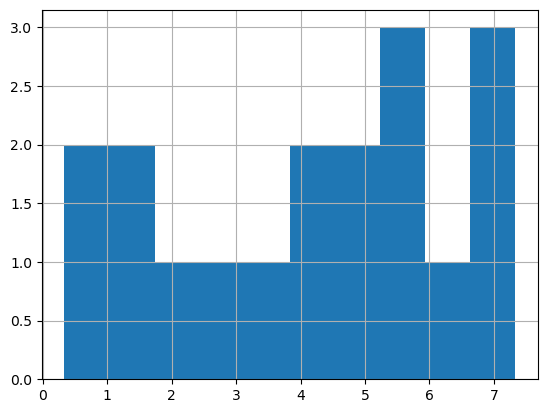

In [384]:
# Display the histogram
impre_read['Rating'].hist()

<Axes: >

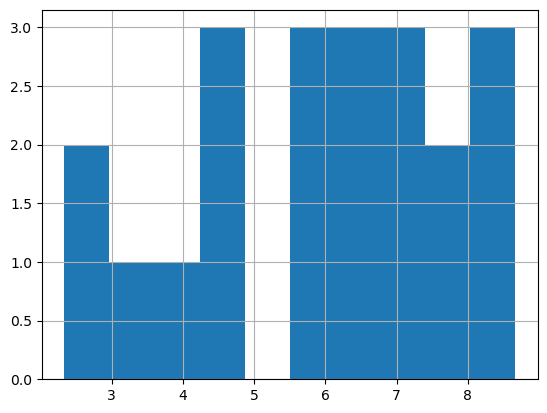

In [385]:
impre_listened['Rating'].hist()

In [386]:
# Test for normal distribution (Shapiro-Wilk test)

# H0: The data are normally distributed
# H1：The data are NOT normally distributed
# Test for normal distribution of impression ratings in read group
score_shapiro_read, p_val_shapiro_read = stats.shapiro(impre_read['Rating'])
print(p_val_shapiro_read)
if p_val_shapiro_read<0.05:
    print('Read group: The data are NOT normally distributed, reject H0')
else:
    print('Read group: The data are normally distributed, confirm H0')

# Test for normal distribution of impression ratings in listened group
score_shapiro_listened, p_val_shapiro_listened = stats.shapiro(impre_listened['Rating'])
print(p_val_shapiro_listened)
if p_val_shapiro_listened<0.05:
    print('listened group: The data are NOT normally distributed, reject H0')
else:
    print('listened group: The data are normally distributed, confirm H0')

0.40011918544769287
Read group: The data are normally distributed, confirm H0
0.21275967359542847
listened group: The data are normally distributed, confirm H0


In [387]:
# Test for homogeneity of variances (Levene's test)
# H0: The population variances are equal
# H1: The population variances are NOT equal
score, p_val = stats.levene(impre_read['Rating'], impre_listened['Rating'])
print(p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

0.5358960150374064
Levene's test is not significant - proceed


Now that the data are normally distributed and the population variances are equal, we can proceed to do independent t-test.

In [388]:
# Independent t-tests
ttest_score, p_val = stats.ttest_ind(impre_read['Rating'], impre_listened['Rating'])
print(p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

0.007091060616710596
Difference is statistically significant - reject H0, confirm H1


### Q7b (answer in words):
To test if there will be a significant difference between overall ratings on the Intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches, we need to conduct an independent t-test. However, to conduct an independent t-test, the variables need to be unpaired, the values of dependent variable need to be continuous, data need to be normally distribued and the variances between the two groups need to be equal.We know the variables are unpaired because there is no connection between the read group and the listened group.Additionally, according to the overview of the data, the data of dependent variable (rating) are continuous.Another, the histograms of both groups suggest normal distribution, and this observation is corroborated by the Shapiro-Wilk tests, where all p-values exceeded 0.05, supporting the null hypothesis (data are normally distributed). Furthermore, the Levene's test produces a p-value higher than 0.05, affirming the null hypothesis that population variances are equal. With all criteria met, independent t-tests can be conducted. The p-value of the t-test for Intellect ratings is below 0.05, indicating rejection of the null hypothesis. This confirms H1 that there is a significant difference between overall ratings on the Intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches. Similar processes and results are obtained for the t-tests on the Hire and Impression scales.